## Name: Ankit Tripathi
## USC ID: 4612676999
## Github : AnkitTripathi45

In [1]:
import pandas as pd
import sklearn
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import _tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.model_selection import GridSearchCV


from sklearn.impute import SimpleImputer

## Question 1.a

In [2]:
names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation Bladder','Nephritis Pelvis']

In [3]:
df=pd.read_csv("../data/diagnosis.data",encoding="UTF-16",delimiter="\t",decimal=",",header=None,names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation Bladder','Nephritis Pelvis'])

In [4]:
df.head()

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation Bladder,Nephritis Pelvis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [5]:
df.replace(('yes','no'),(1,0),inplace=True)

In [6]:
inputs=df.iloc[:,:-2]
outputs=df.iloc[:,-2:]
outputs

,Inflammation Bladder,Nephritis Pelvis
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
115,0,1
116,0,0
117,0,1
118,0,1


## Question 1.b

In [7]:
model= tree.DecisionTreeClassifier()
classifier=LabelPowerset(model)
classifier.fit(inputs,outputs)
y_output=classifier.transform(outputs)

y_output

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2,
       3, 0, 2, 2, 3, 2, 0, 2, 2, 2])

[Text(0.4, 0.9, 'Lumbar <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.2, 0.7, 'Temperature <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.6, 0.7, 'Temperature <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'Micturition <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]\nclass = 2'),
 Text(0.8, 0.3, 'Urine <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = 2'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = 3')]

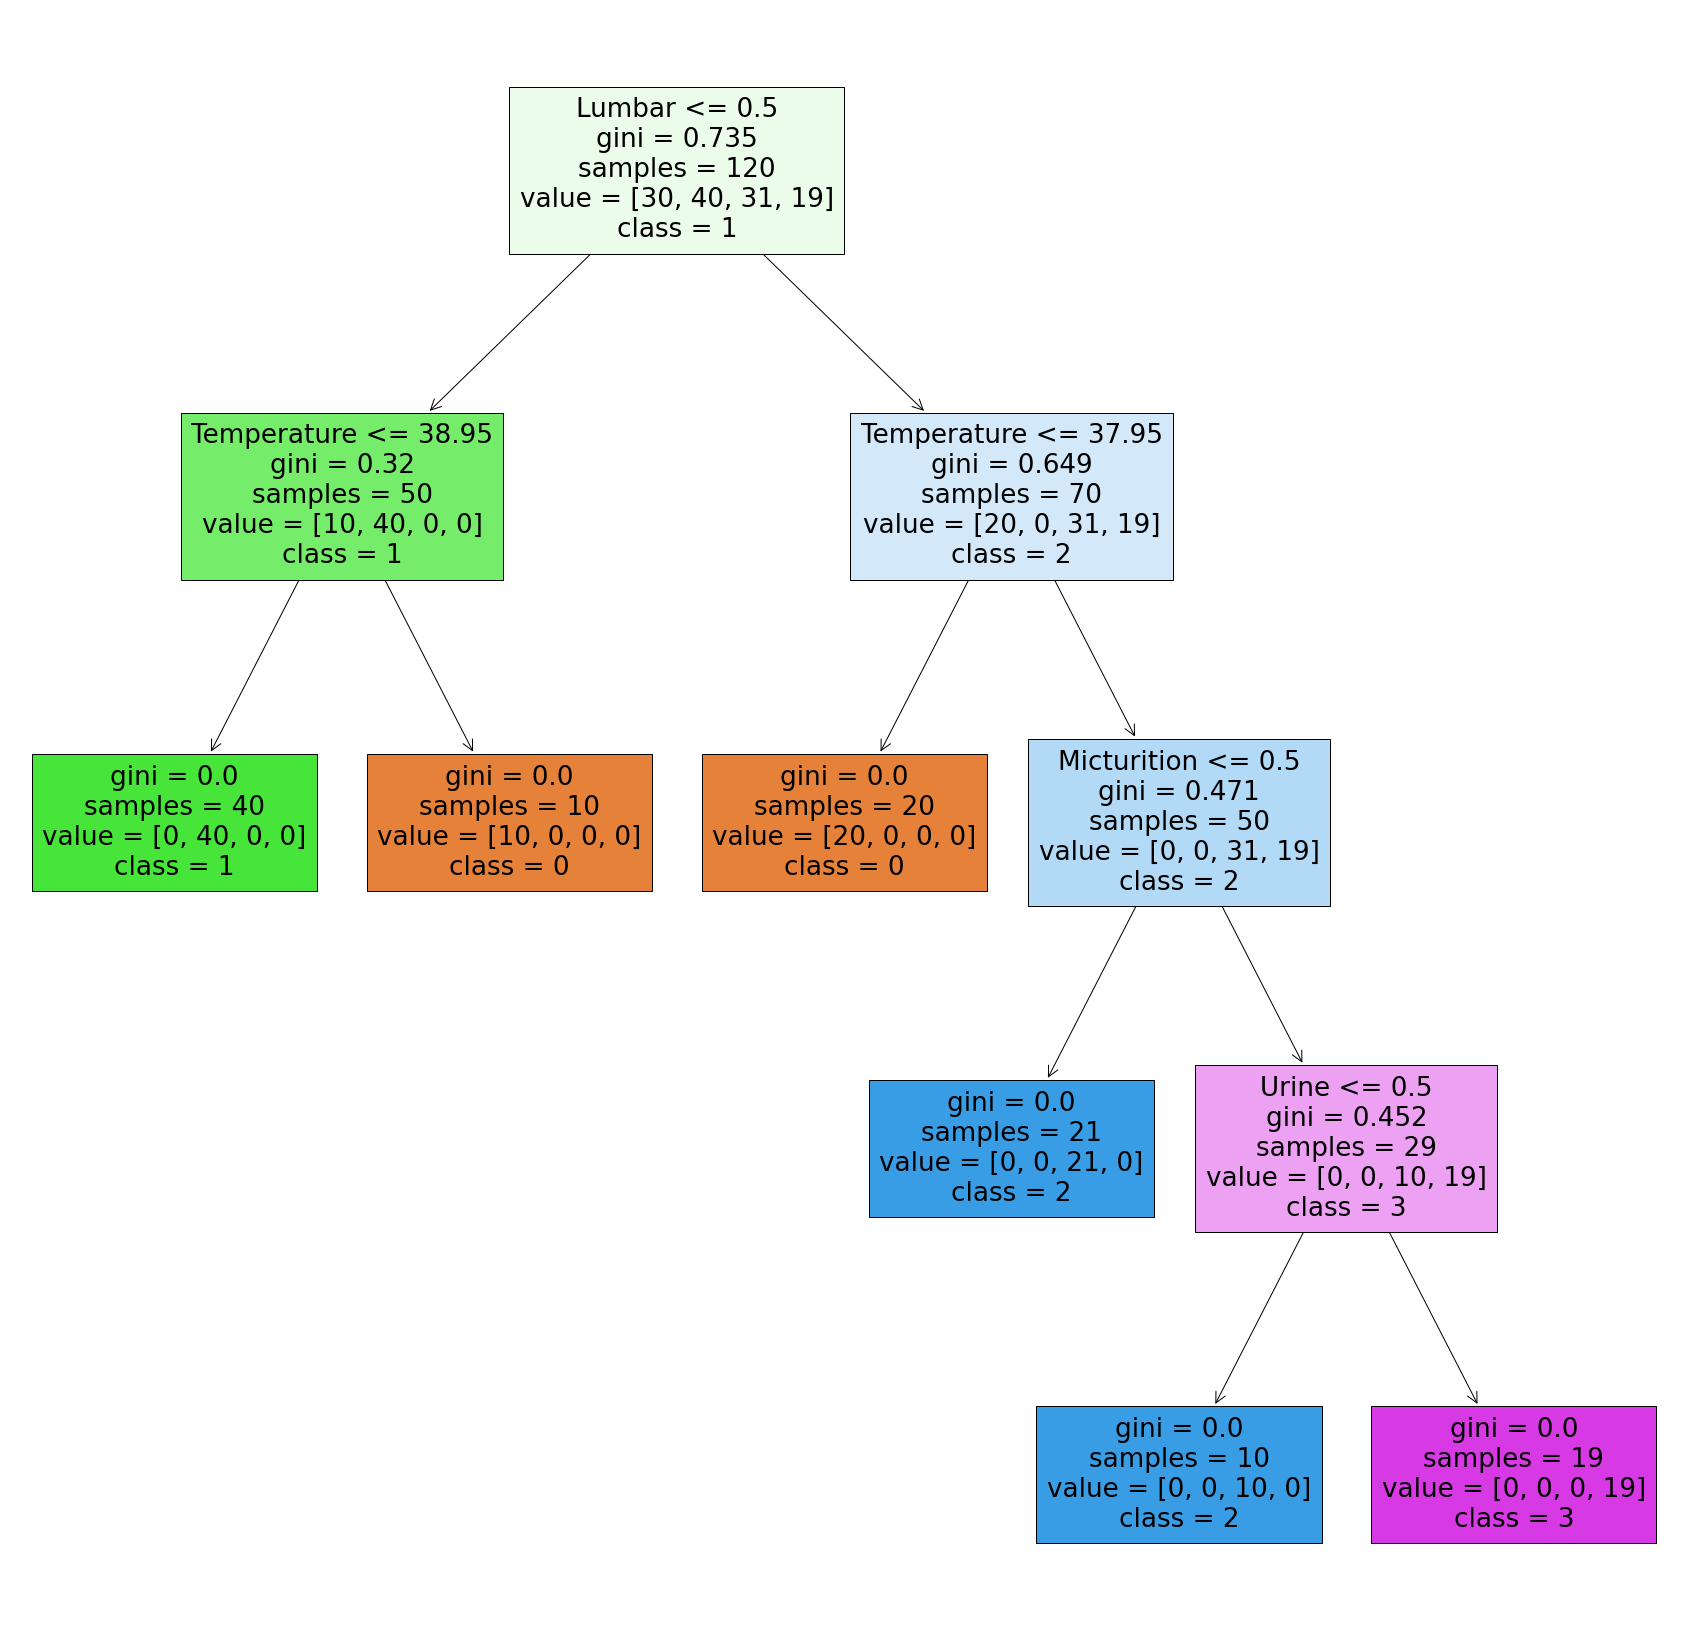

In [8]:
clf=model.fit(inputs,y_output)

fig, axe = plt.subplots(figsize=(30,30))
tree.plot_tree(clf,filled=True,feature_names=names,class_names=['0','1','2','3'])


## Question 1.c

In [9]:
def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0,1)

In [10]:
tree_to_code(model,names)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation Bladder, Nephritis Pelvis):
  if Lumbar <= 0.5:
    if Temperature <= 38.95000076293945:
      return [[ 0. 40.  0.  0.]]
    else:  # if Temperature > 38.95000076293945
      return [[10.  0.  0.  0.]]
  else:  # if Lumbar > 0.5
    if Temperature <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Temperature > 37.95000076293945
      if Micturition <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine > 0.5
          return [[ 0.  0.  0. 19.]]


## Question 1.d

In [11]:
deciTree_cstcmplx = DecisionTreeClassifier(random_state=0)
path = deciTree_cstcmplx.cost_complexity_pruning_path(inputs, y_output)
ccp_alphas= path.ccp_alphas
deciTree_cv=GridSearchCV(deciTree_cstcmplx,cv=5,param_grid={'ccp_alpha':ccp_alphas})
deciTree_cv.fit(inputs,y_output)
best_alpha=deciTree_cv.best_params_['ccp_alpha']
print('Best ccp Alpha value: ',best_alpha)

Best ccp Alpha value:  0.0


Score  1.0


[Text(0.4, 0.9, 'Lumbar <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.2, 0.7, 'Temperature <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.6, 0.7, 'Temperature <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'Micturition <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]\nclass = 2'),
 Text(0.8, 0.3, 'Urine <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = 2'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = 3')]

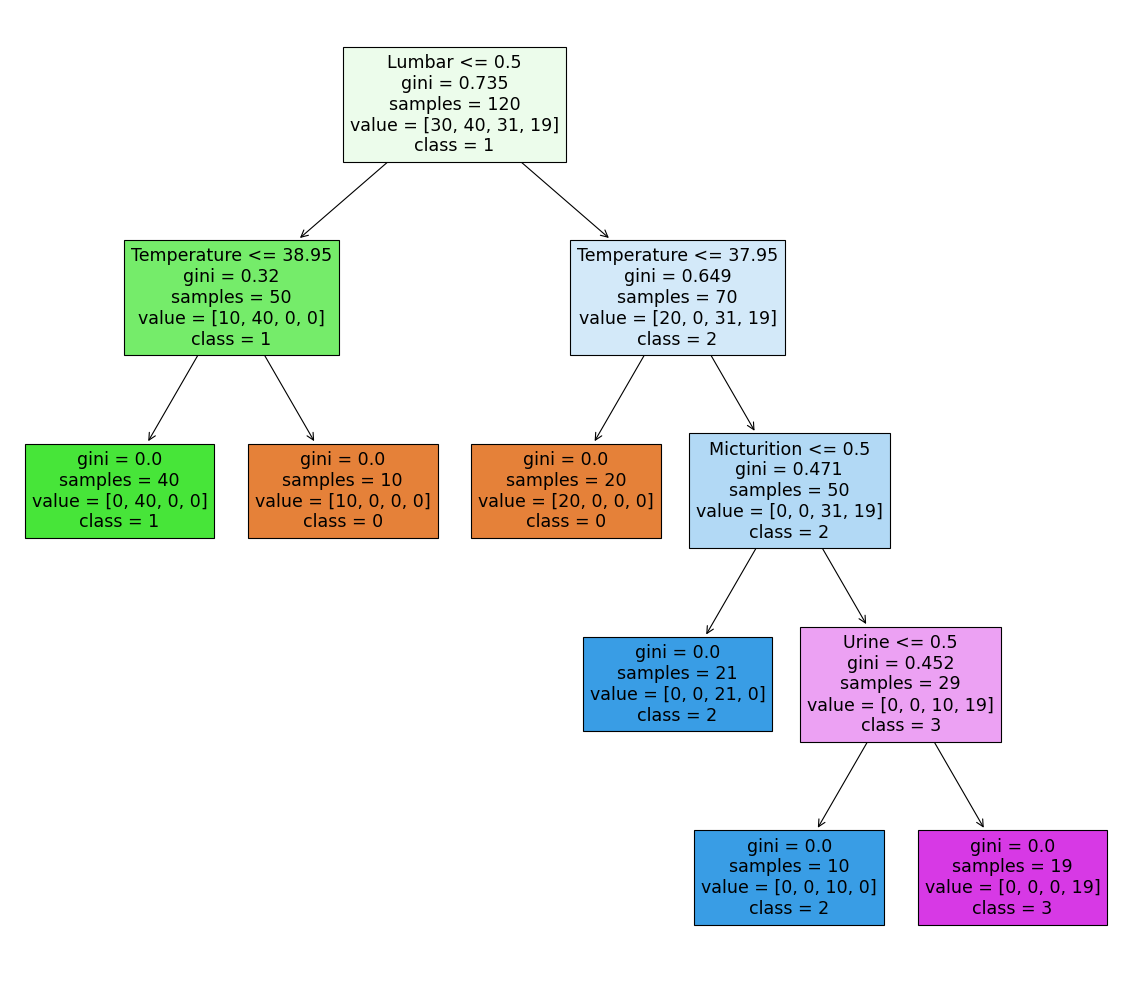

In [12]:
deciTree= DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
deciTree.fit(inputs,y_output)
print("Score ", deciTree.score(inputs,y_output))
fig = plt.figure(figsize=(18, 16), dpi=80)
tree.plot_tree(deciTree,feature_names=inputs.columns,class_names=['0','1','2','3'],filled=True)

In [13]:
tree_to_code(deciTree, inputs.columns)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Lumbar <= 0.5:
    if Temperature <= 38.95000076293945:
      return [[ 0. 40.  0.  0.]]
    else:  # if Temperature > 38.95000076293945
      return [[10.  0.  0.  0.]]
  else:  # if Lumbar > 0.5
    if Temperature <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Temperature > 37.95000076293945
      if Micturition <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine > 0.5
          return [[ 0.  0.  0. 19.]]


### Question 2.a

In [14]:
x='''@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
@attribute PctPopUnderPov numeric
@attribute PctLess9thGrade numeric
@attribute PctNotHSGrad numeric
@attribute PctBSorMore numeric
@attribute PctUnemployed numeric
@attribute PctEmploy numeric
@attribute PctEmplManu numeric
@attribute PctEmplProfServ numeric
@attribute PctOccupManu numeric
@attribute PctOccupMgmtProf numeric
@attribute MalePctDivorce numeric
@attribute MalePctNevMarr numeric
@attribute FemalePctDiv numeric
@attribute TotalPctDiv numeric
@attribute PersPerFam numeric
@attribute PctFam2Par numeric
@attribute PctKids2Par numeric
@attribute PctYoungKids2Par numeric
@attribute PctTeen2Par numeric
@attribute PctWorkMomYoungKids numeric
@attribute PctWorkMom numeric
@attribute NumIlleg numeric
@attribute PctIlleg numeric
@attribute NumImmig numeric
@attribute PctImmigRecent numeric
@attribute PctImmigRec5 numeric
@attribute PctImmigRec8 numeric
@attribute PctImmigRec10 numeric
@attribute PctRecentImmig numeric
@attribute PctRecImmig5 numeric
@attribute PctRecImmig8 numeric
@attribute PctRecImmig10 numeric
@attribute PctSpeakEnglOnly numeric
@attribute PctNotSpeakEnglWell numeric
@attribute PctLargHouseFam numeric
@attribute PctLargHouseOccup numeric
@attribute PersPerOccupHous numeric
@attribute PersPerOwnOccHous numeric
@attribute PersPerRentOccHous numeric
@attribute PctPersOwnOccup numeric
@attribute PctPersDenseHous numeric
@attribute PctHousLess3BR numeric
@attribute MedNumBR numeric
@attribute HousVacant numeric
@attribute PctHousOccup numeric
@attribute PctHousOwnOcc numeric
@attribute PctVacantBoarded numeric
@attribute PctVacMore6Mos numeric
@attribute MedYrHousBuilt numeric
@attribute PctHousNoPhone numeric
@attribute PctWOFullPlumb numeric
@attribute OwnOccLowQuart numeric
@attribute OwnOccMedVal numeric
@attribute OwnOccHiQuart numeric
@attribute RentLowQ numeric
@attribute RentMedian numeric
@attribute RentHighQ numeric
@attribute MedRent numeric
@attribute MedRentPctHousInc numeric
@attribute MedOwnCostPctInc numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute NumInShelters numeric
@attribute NumStreet numeric
@attribute PctForeignBorn numeric
@attribute PctBornSameState numeric
@attribute PctSameHouse85 numeric
@attribute PctSameCity85 numeric
@attribute PctSameState85 numeric
@attribute LemasSwornFT numeric
@attribute LemasSwFTPerPop numeric
@attribute LemasSwFTFieldOps numeric
@attribute LemasSwFTFieldPerPop numeric
@attribute LemasTotalReq numeric
@attribute LemasTotReqPerPop numeric
@attribute PolicReqPerOffic numeric
@attribute PolicPerPop numeric
@attribute RacialMatchCommPol numeric
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric
@attribute OfficAssgnDrugUnits numeric
@attribute NumKindsDrugsSeiz numeric
@attribute PolicAveOTWorked numeric
@attribute LandArea numeric
@attribute PopDens numeric
@attribute PctUsePubTrans numeric
@attribute PolicCars numeric
@attribute PolicOperBudg numeric
@attribute LemasPctPolicOnPatr numeric
@attribute LemasGangUnitDeploy numeric
@attribute LemasPctOfficDrugUn numeric
@attribute PolicBudgPerPop numeric
@attribute ViolentCrimesPerPop numeric'''.split('\n')

In [15]:
x=[i.split(' ')[1] for i in x]

In [16]:
df_com=pd.read_csv("../data/communities.data",header=None,names=x)
df_com.replace(('?'),(np.nan),inplace=True)
df_com.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [17]:
df_fnl=df_com.drop(['state','county','community','communityname','fold'],axis=1)
df_fnl

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [18]:
train_set=df_fnl[0:1495]
test_set=df_fnl[1495:]


## Question 2.b

In [19]:
col_list=df_fnl.columns.tolist()

In [20]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_arr=imp_mean.fit_transform(train_set)

train_fnl=pd.DataFrame(train_arr,columns=col_list)
train_fnl

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [21]:
test_fnl=imp_mean.fit_transform(test_set)
test_fnl=pd.DataFrame(test_fnl,columns=col_list)
test_fnl

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.0800,0.060000,0.780000,0.00000,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.0200,0.020000,0.790000,0.00000,0.22,0.180,0.19


## Question 2.c
Plot a correlation matrix for the features in the data set.

In [22]:
frames=[train_fnl,test_fnl]
complete_data = pd.concat(frames)
complete_data.reset_index(drop=True,inplace=True)


In [23]:
complete_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.160500,0.065375,0.655375,0.406250,0.00,0.208000,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.160500,0.065375,0.655375,0.406250,0.00,0.208000,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [24]:
complete_data.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609025,0.591863,-0.060176,0.075756,0.466352,-0.035108,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032958,-0.009528,-0.011031,-0.002349,-0.094368,-0.052340,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.121997,0.082672,-0.079922,0.010885,0.260793,0.022149,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109236,-0.114599,0.050180,-0.033414,-0.276234,-0.005907,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.018025,0.067119,0.030704,0.064770,0.101888,-0.011324,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.060176,-0.011031,-0.079922,0.050180,0.030704,0.024973,-0.003476,0.009213,0.012742,0.019504,...,-0.071618,0.053388,0.026682,-0.107241,-0.058583,1.000000,0.035644,0.020296,-0.254718,-0.031598
LemasGangUnitDeploy,0.075756,-0.002349,0.010885,-0.033414,0.064770,0.026412,0.009440,0.003542,-0.001200,-0.036443,...,0.106469,-0.076351,-0.080706,0.079727,0.034917,0.035644,1.000000,-0.015673,-0.032356,0.057304
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052428,-0.062375,0.020296,-0.015673,1.000000,0.018603,0.348627
PolicBudgPerPop,-0.035108,-0.052340,0.022149,-0.005907,-0.011324,0.001647,-0.074535,-0.066743,-0.049417,0.070538,...,-0.110060,0.067016,0.077984,0.242517,0.245440,-0.254718,-0.032356,0.018603,1.000000,0.042793


<AxesSubplot:>

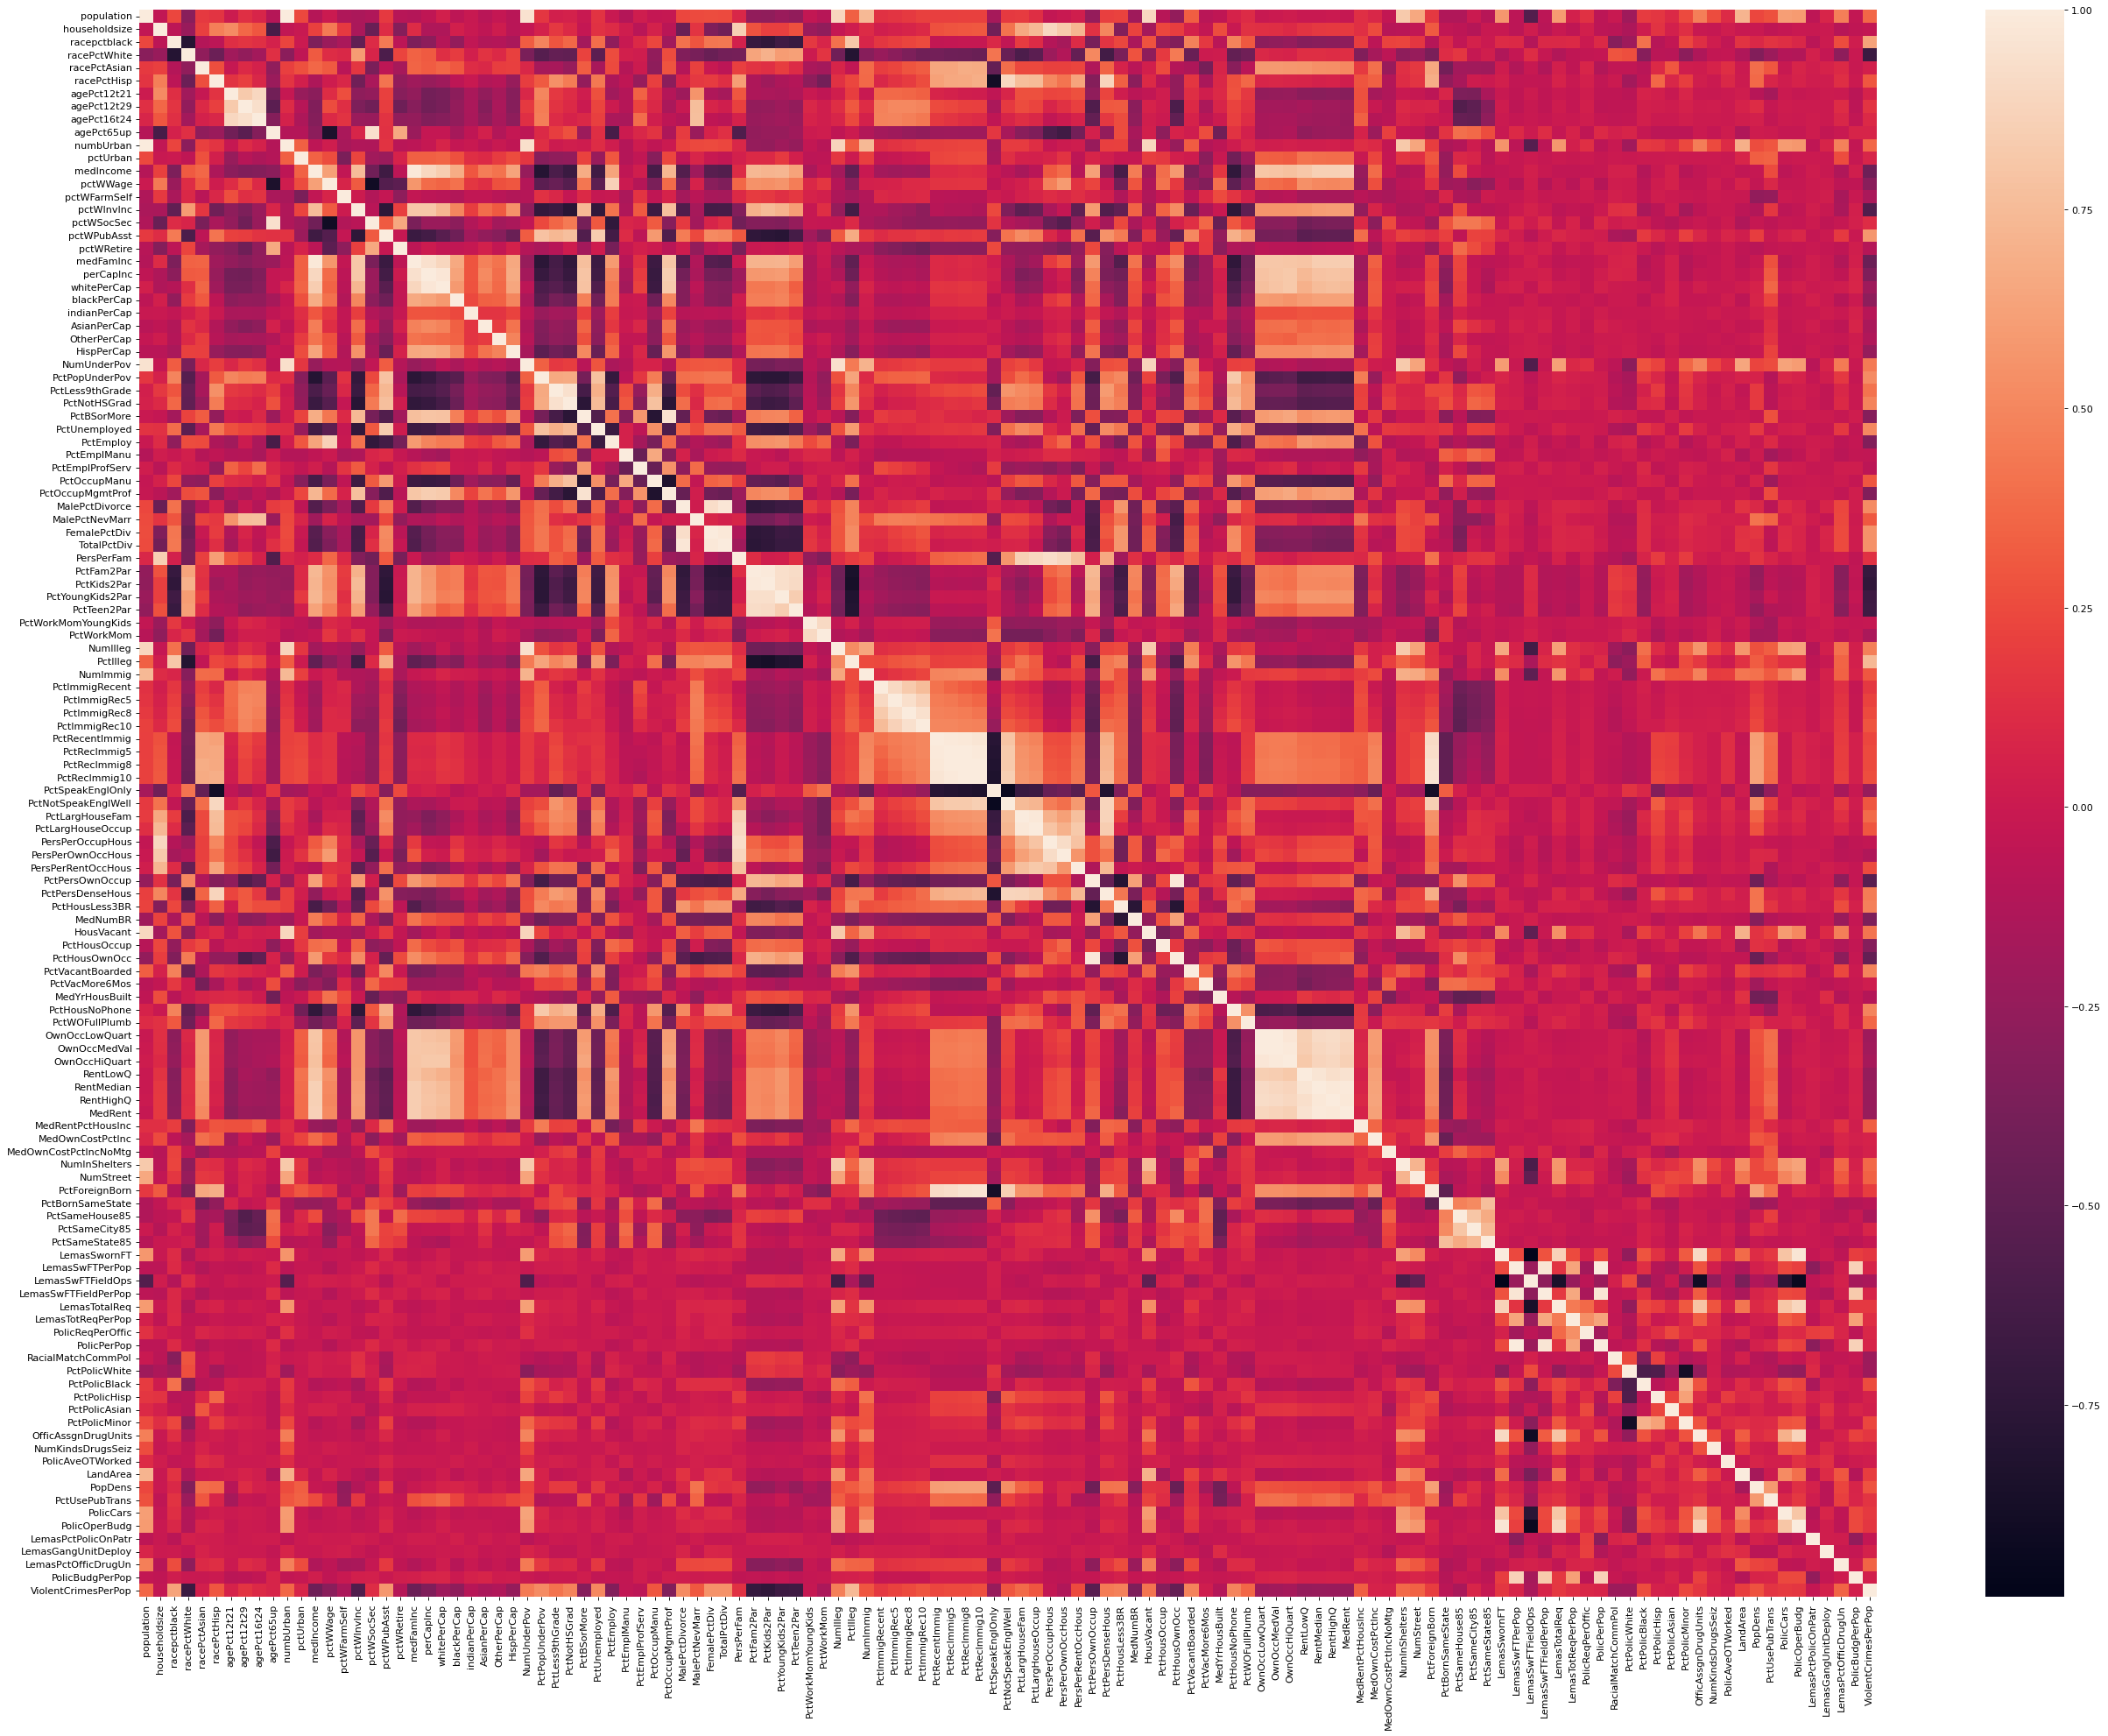

In [25]:
plt.figure(figsize=(40,30),dpi=80)
sns.heatmap(complete_data.corr())

## Question 2.d

Calculate the Coeficient of Variation CV for each feature, where CV = s/m, in
which s is sample standard deviation and m is sample mean..

In [26]:
CV={}
for i in complete_data.columns[:]:
    std=complete_data[i].std()
    mn=complete_data[i].mean()
    cv=std/mn
    CV[i]=cv

In [27]:
CV

{'population': 2.203502536390972,
 'householdsize': 0.3532983018683109,
 'racepctblack': 1.4109203963756864,
 'racePctWhite': 0.3237815624993411,
 'racePctAsian': 1.3591621938222074,
 'racePctHisp': 1.614277791710685,
 'agePct12t21': 0.36583986883972397,
 'agePct12t29': 0.29069288841904145,
 'agePct16t24': 0.4951605143654288,
 'agePct65up': 0.42344170889026195,
 'numbUrban': 2.0017436381957676,
 'pctUrban': 0.6388488712113656,
 'medIncome': 0.5797533935755996,
 'pctWWage': 0.3277100586060616,
 'pctWFarmSelf': 0.7000301156104908,
 'pctWInvInc': 0.35923994722340613,
 'pctWSocSec': 0.36851263032540155,
 'pctWPubAsst': 0.699030504203365,
 'pctWRetire': 0.3496390828575848,
 'medFamInc': 0.527731885342079,
 'perCapInc': 0.545633428419145,
 'whitePerCap': 0.5075521907214038,
 'blackPerCap': 0.5894690036844645,
 'indianPerCap': 0.8096850868666168,
 'AsianPerCap': 0.6061938508790911,
 'OtherPerCap': 0.6706480702030861,
 'HispPerCap': 0.4739597186074789,
 'NumUnderPov': 2.304969714852185,
 'PctP

## Question 2.e

Pick sqrt(128) features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about signicance of those features, just by the
scatter plots?

In [28]:
count=math.floor(np.sqrt(128))
count

11

In [29]:
sort_CV={k: v for k, v in sorted(CV.items(), key=lambda item: item[1])}
top_features=[x for x in list(sort_CV)[-count:]]
top_features.reverse()
top_features

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

In [30]:
df_top_feat=complete_data[top_features]
df_train_top=train_fnl[top_features]
df_test_top=test_fnl[top_features]

In [31]:
df_top_features=df_top_feat
df_top_features['ViolentCrimesPerPop']=df_fnl['ViolentCrimesPerPop']

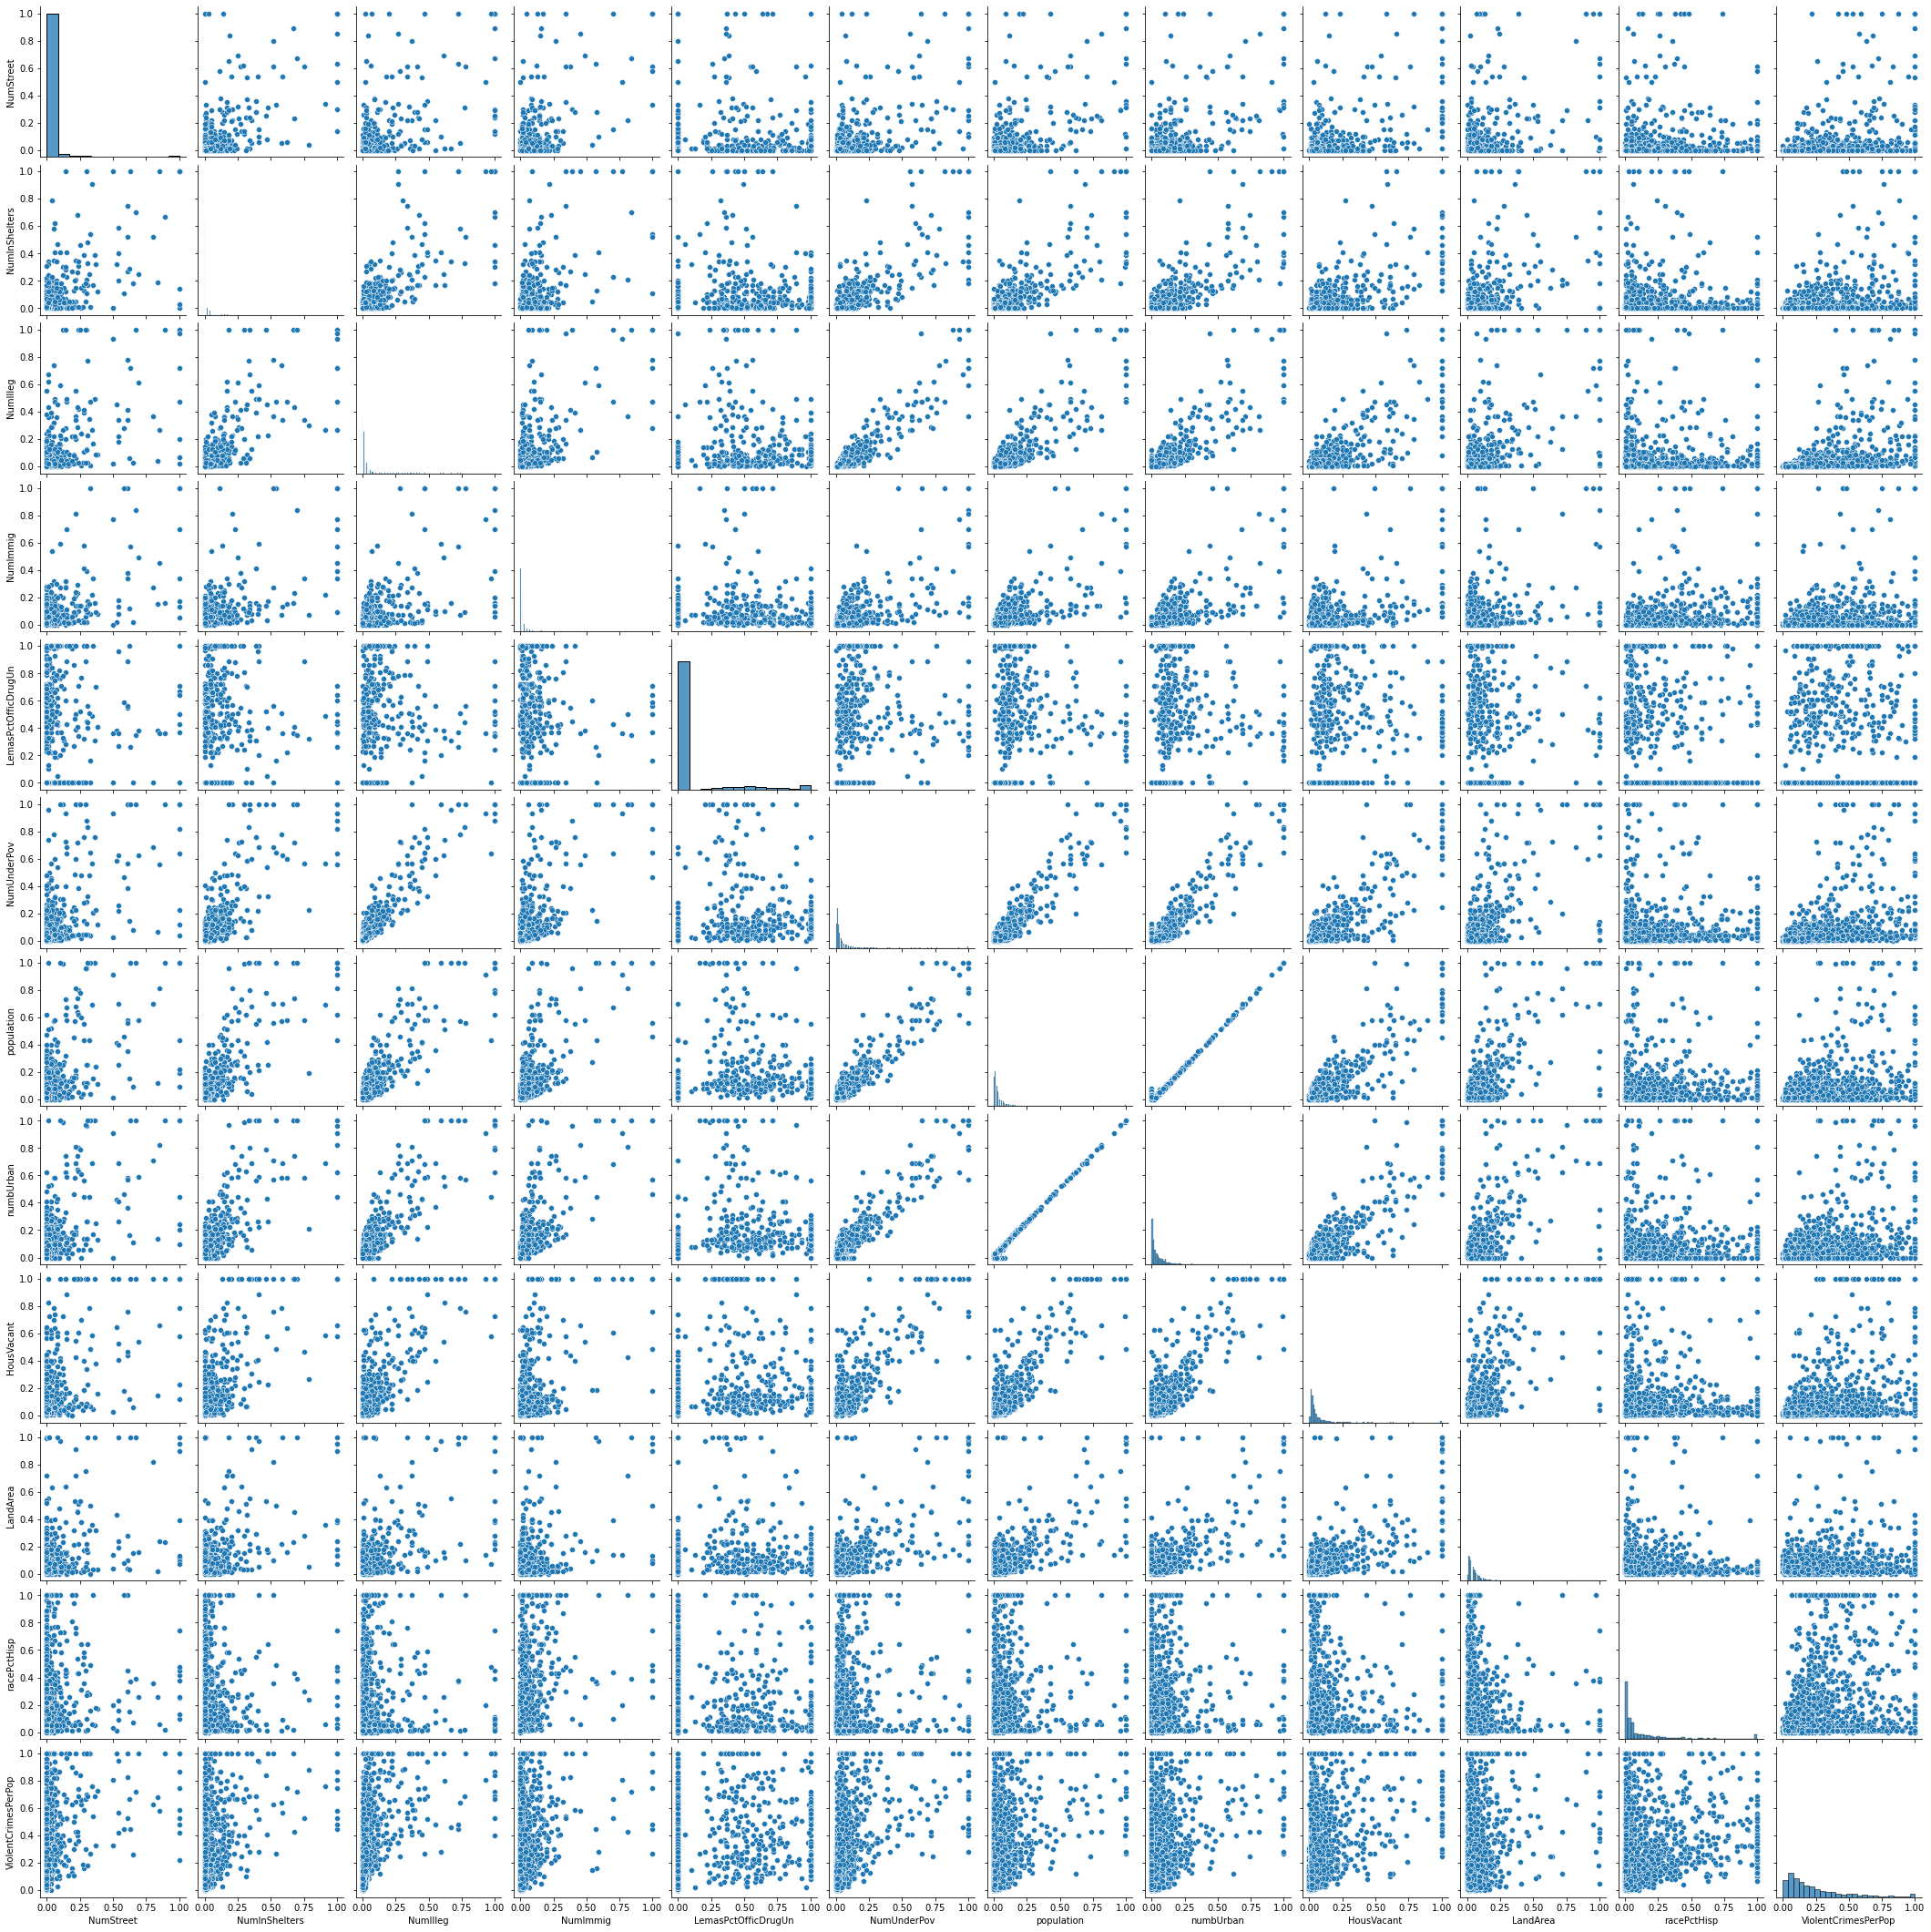

In [32]:
sns.pairplot(df_top_features)

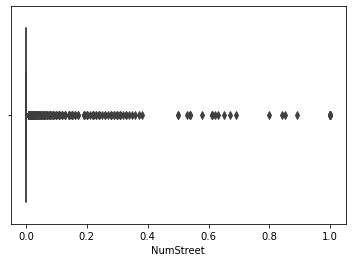

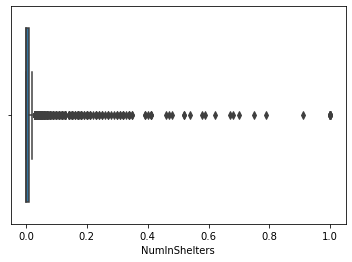

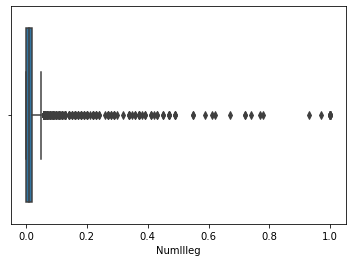

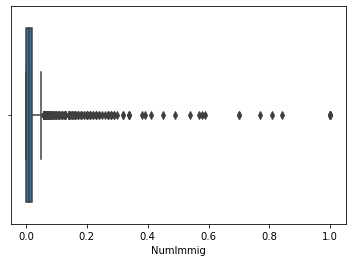

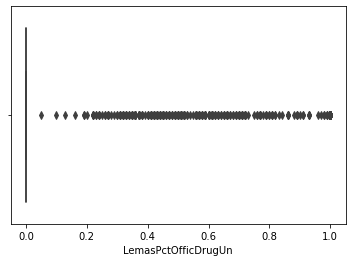

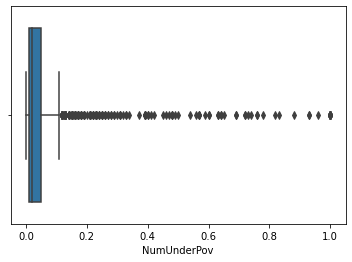

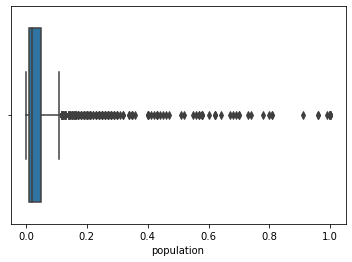

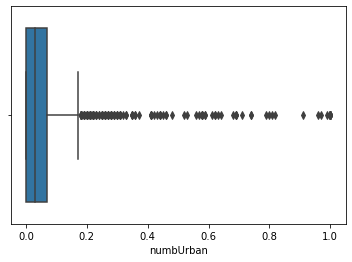

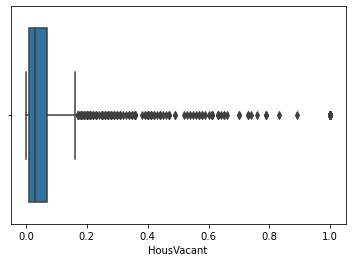

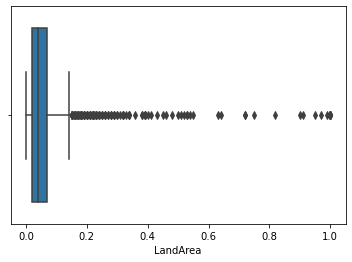

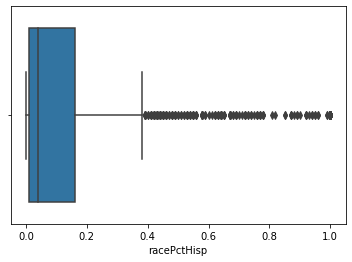

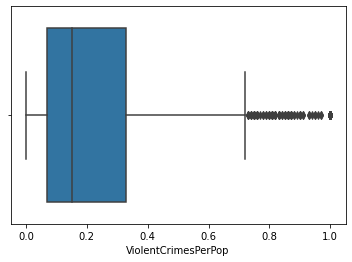

In [33]:
for i in df_top_feat.columns:
    plt.figure()

    sns.boxplot(df_top_feat[i])

**No Conclusion can be made of the significance of the features with only Scatter plot.**

## Question 2.f

Fit a linear model using least squares to the training set and report the test error.

In [34]:
X_train=df_train_top
Y_train=train_fnl['ViolentCrimesPerPop']
X_test=df_test_top
Y_test=test_fnl['ViolentCrimesPerPop']


In [35]:
reg = LinearRegression().fit(X_train, Y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)
print("MSE for Train set:",mean_squared_error(Y_train,y_train_pred))
print("MSE for Test set:",mean_squared_error(Y_test,y_test_pred))

MSE for Train set: 0.0365611631745262
MSE for Test set: 0.029257512649890818


## Question 2.g
Fit a ridge regression model on the training set, with  chosen by cross-validation.
Report the test error obtained.

In [36]:
ridge_best_alpha=RidgeCV(alphas=(1e-3, 1e-2, 1e-1, 1),cv=10)
ridge_best_alpha.fit(X_train,Y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 1), cv=10)

In [37]:
bst_alpha=ridge_best_alpha.alpha_
print(bst_alpha)

1.0


In [38]:
ridge_clf = Ridge(bst_alpha).fit(X_train,Y_train)
y_ridge_pred_train=ridge_clf.predict(X_train)
y_ridge_pred_test=ridge_clf.predict(X_test)
print("MSE for Ridge Regression Train set:",mean_squared_error(Y_train,y_ridge_pred_train))
print("MSE for Ridge Regression Test set:",mean_squared_error(Y_test,y_ridge_pred_test))

MSE for Ridge Regression Train set: 0.03687323698722501
MSE for Ridge Regression Test set: 0.02924216912907391


## Question 2.h

Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4 features. Report the test error for both cases and
compare them.

In [39]:
lasso_reg = LassoCV(cv=5,alphas=(1e-3, 1e-2, 1e-1, 1))
lasso_reg.fit(X_train, Y_train)

LassoCV(alphas=(0.001, 0.01, 0.1, 1), cv=5)

In [40]:
best_alpha_lasso=lasso_reg.alpha_
best_alpha_lasso

0.001

In [41]:
lasso_clf=Lasso(alpha=best_alpha_lasso)
lasso_clf.fit(X_train,Y_train)

y_lasso_pred_train=lasso_clf.predict(X_train)
y_lasso_pred_test=lasso_clf.predict(X_test)

print("MSE for Lasso Regression Train set:",mean_squared_error(Y_train,y_lasso_pred_train))
print("MSE for Lasso Regression Test set:",mean_squared_error(Y_test,y_lasso_pred_test))

MSE for Lasso Regression Train set: 0.03909624629509663
MSE for Lasso Regression Test set: 0.030573159489542378


In [42]:
best_coeff_lasso=lasso_reg.coef_
#lasso_imp=[X_train.columns[x] for x in range(0,len(X_train.columns[:-1])) if best_coeff_lasso[x]!=0]

lasso_imp=[]
for i in range(len(list(best_coeff_lasso))):
    if abs(best_coeff_lasso[i])!=0:
        lasso_imp.append(lasso_reg.feature_names_in_[i])
print("The selected variables are:")
print(lasso_imp)

The selected variables are:
['NumStreet', 'NumIlleg', 'LemasPctOfficDrugUn', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


## Question 2.i

Fit a PCR model on the training set, with M (the number of principal compo-
nents) chosen by cross-validation. Report the test error obtained.

In [43]:
cv_pcr = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
reg_pcr = LinearRegression().fit(X_train, Y_train)
score_train = -1 * cross_val_score(reg_pcr, X_train, Y_train, cv=cv_pcr, scoring='neg_root_mean_squared_error').mean()
score_test = mean_squared_error(Y_test, reg_pcr.predict(X_test),squared=False)

In [44]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pd.DataFrame(pca.components_.T,columns=top_features).loc[:4,:] # 1st 5 rows of all principal components

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.185650,-0.011895,0.128915,0.601933,0.494037,-0.465506,-0.110740,0.320699,-0.102475,0.008337,-0.000737
1,0.233835,-0.060400,0.149822,0.328574,-0.084159,-0.080142,0.641002,-0.611046,-0.091718,0.070400,-0.011448
2,0.279696,-0.064924,0.170450,0.097968,-0.391130,0.010089,0.272642,0.424865,0.360019,-0.584067,0.015117
3,0.188017,0.073972,0.105073,0.346411,0.175973,0.498351,-0.389717,-0.304584,0.551382,-0.002564,-0.011714
4,0.463319,-0.094086,-0.879526,0.033298,0.021948,0.008717,0.029146,0.012862,0.014252,-0.001416,0.005512


In [45]:
reglin = LinearRegression()

# Create empty list to store RMSE for each iteration
list_rmse = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pca.shape[1]+1):
    score_rmse = -1 * cross_val_score(reglin, X_train_pca[:,:i], Y_train, cv=cv_pcr, scoring='neg_root_mean_squared_error').mean()
    list_rmse.append(score_rmse)

In [46]:
min(list_rmse)

0.19378781512178775

In [47]:
pca_best= list_rmse.index(min(list_rmse))+1
pca_best

9

In [48]:
pca_reg = LinearRegression().fit(X_train_pca[:,:pca_best],Y_train)

In [49]:
score_train_pcr = -1 * cross_val_score(pca_reg, 
                                       X_train_pca[:,:pca_best], 
                                       Y_train, 
                                       cv=cv_pcr, 
                                       scoring='neg_root_mean_squared_error').mean()

pca_reg = LinearRegression().fit(X_train_pca[:,:pca_best], Y_train)# Training model

# Get first 9 principal components of test set
X_test_pca = pca.transform(X_test)[:,:pca_best] # 1st 9 principal components of test set

# Predict on test data
pred_lr = pca_reg.predict(X_test_pca) # Predict on test data
pcr_score_test = mean_squared_error(Y_test, pred_lr,squared=False)
print("The test error for PCR model:",pcr_score_test)

The test error for PCR model: 0.1709351108805268


## Question 2.j

In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine
alpha (the regularization term) using cross-validation.

In [50]:
xgbreg= xgb.XGBRegressor(seed=4)

In [51]:
xgb_CV=GridSearchCV(xgbreg,scoring='neg_mean_squared_error',cv=5,param_grid={'reg_alpha':[0.001,0.01,0.1,1,10,100]})


In [52]:
xgb_CV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [53]:
best_alpha_xg=xgb_CV.best_params_['reg_alpha']
print('Best Alpha: ', best_alpha_xg)

Best Alpha:  1


In [54]:
xgb_bst = xgb.XGBRegressor(reg_alpha=best_alpha,seed=4)
xgb_bst.fit(X_train,Y_train)
y_train_pred_xgb=xgb_bst.predict(X_train)
y_test_pred_xgb=xgb_bst.predict(X_test)
print('MSE XGboost Train Error',mean_squared_error(Y_train,y_train_pred_xgb))
print('MSE XGBoost Test Error',mean_squared_error(Y_test,y_test_pred_xgb))

MSE XGboost Train Error 0.0018769661876074288
MSE XGBoost Test Error 0.023462377386414105
